In [ ]:
## from dstndstn
import numpy as np
import pylab as plt
import emcee

In [3]:
cov = np.array([[ 340., -1.7], [-1.7, 0.012]])

In [4]:
def logprob2(params):
    x,y = params
    xy = np.array([x,y])
    mu = np.array([-30.,+0.18])
    dist = (xy - mu).T @ np.linalg.inv(cov * 0.6) @ (xy - mu)
    mu2 = np.array([+30.,-0.18])
    dist2 = (xy - mu2).T @ np.linalg.inv(cov * 0.6) @ (xy - mu2)
    logprob = np.logaddexp(-0.5 * dist - np.log(np.sqrt(np.linalg.det(cov))),
                           -0.5 * dist2 - np.log(np.sqrt(np.linalg.det(cov))))
    return logprob

In [5]:
xlo,xhi = -75., +75.
ylo,yhi = -0.5, +0.5
xgrid = np.linspace(xlo, xhi, 100)
ygrid = np.linspace(ylo, yhi, 101)
xx,yy = np.meshgrid(xgrid, ygrid)

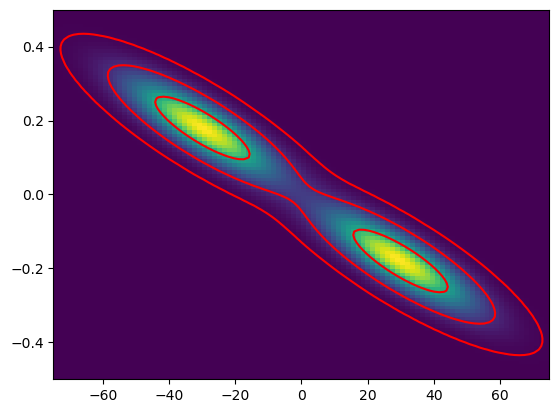

In [6]:
L2 = np.array([logprob2((x,y)) for x,y in zip(xx.ravel(), yy.ravel())]).reshape(xx.shape)
plt.imshow(np.exp(L2), interpolation='nearest', origin='lower', extent=[xlo,xhi,ylo,yhi], aspect='auto');
mx = np.max(np.exp(L2))
plt.contour(xx, yy, np.exp(L2), extent=[xlo,xhi,ylo,yhi], colors='r', levels=mx*np.exp(-0.5 * np.arange(1,4)[::-1]**2));

In [7]:
nwalkers = 100 
ndim = 2 
sampler = emcee.EnsembleSampler(nwalkers, ndim, logprob2)

In [14]:
p0 = np.random.rand(nwalkers, ndim)*[0.1, 0.1] + [0., 0.4]

In [19]:
r0 = sampler.run_mcmc(p0, 100)

In [20]:
coord, log_probs, randstate = r0

In [30]:
r1 = sampler.run_mcmc(coord, 100)

In [31]:
sampler.chain.shape

(100, 400, 2)

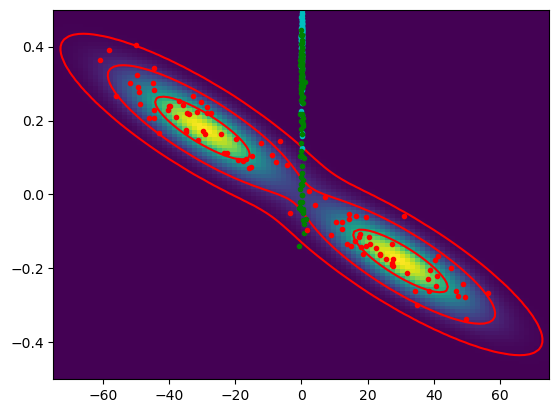

In [33]:
L2 = np.array([logprob2((x,y)) for x,y in zip(xx.ravel(), yy.ravel())]).reshape(xx.shape)
plt.imshow(np.exp(L2), interpolation='nearest', origin='lower', extent=[xlo,xhi,ylo,yhi], aspect='auto');
mx = np.max(np.exp(L2))
plt.contour(xx, yy, np.exp(L2), extent=[xlo,xhi,ylo,yhi], colors='r', levels=mx*np.exp(-0.5 * np.arange(1,4)[::-1]**2));
plt.plot(sampler.chain[:, 5, 0], sampler.chain[:, 5, 1], "c.")
plt.plot(sampler.chain[:, 15, 0], sampler.chain[:, 15, 1], "g.")
plt.plot(sampler.chain[:, 300, 0], sampler.chain[:, 300, 1], "r.")

In [12]:
ndim = 2
nwalkers = 100

nburn = 100
nsteps = 2000

p0 = np.random.rand(nwalkers, ndim)
p0[:,0] += -40
p0[:,1] *= 0.01
p0[:,1] += -0.3

sampler = emcee.EnsembleSampler(nwalkers, ndim, logprob2)
# Let's start by running a "burn-in" phase for 100 steps.
r = sampler.run_mcmc(p0, nburn)
# Let's save that burn-in chain for later plotting!
burn_chain = sampler.get_chain()
sampler.reset()
# Now we'll take the results of the burn-in and do a "real" run (starting from the last coordinates from the burn-in phase).
sampler.run_mcmc(r.coords, nsteps);


In [11]:
np.mean(sampler.acceptance_fraction)

np.float64(0.620345)

In [12]:
ch = sampler.get_chain()
ch.shape
#plt.plot(ch[-1,:,0], ch[-1,:,1], 'g.');
#plt.plot(ch[-50,:,0], ch[-50,:,1], 'rx');
#plt.plot(ch[-100,:,0], ch[-100,:,1], 's',mec='b',mfc='none');

(2000, 100, 2)

In [13]:
sampler.flatchain.shape

(200000, 2)

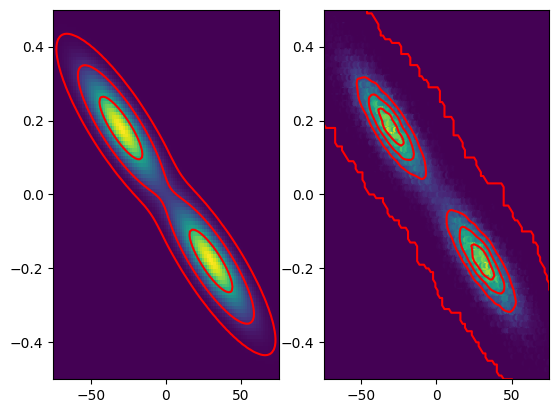

In [14]:
plt.subplot(1,2,1)
plt.imshow(np.exp(L2), interpolation='nearest', origin='lower', extent=[xlo,xhi,ylo,yhi], aspect='auto');
mx = np.max(np.exp(L2))
plt.contour(xx, yy, np.exp(L2), extent=[xlo,xhi,ylo,yhi], colors='r', levels=mx*np.exp(-0.5 * np.arange(1,4)[::-1]**2));
ax = plt.axis()
plt.subplot(1,2,2)
#plt.plot(sampler.flatchain[:,0], sampler.flatchain[:,1], '.', alpha=0.01);
plt.hexbin(sampler.flatchain[:,0], sampler.flatchain[:,1], extent=ax);
plt.axis(ax)

dx = xgrid[1]-xgrid[0]
dy = ygrid[1]-ygrid[0]
xedges = -0.5*dx + np.append(xgrid, xgrid[-1]+dx)
yedges = -0.5*dy + np.append(ygrid, ygrid[-1]+dy)

N,_ = sampler.flatchain.shape
H,xe,ye = plt.histogram2d(sampler.flatchain[:,0], sampler.flatchain[:,1], bins=(xedges, yedges))
from scipy.ndimage import gaussian_filter
H = gaussian_filter(H, 1.)
plt.contour(xgrid, ygrid, H.T, colors='r', levels=3);


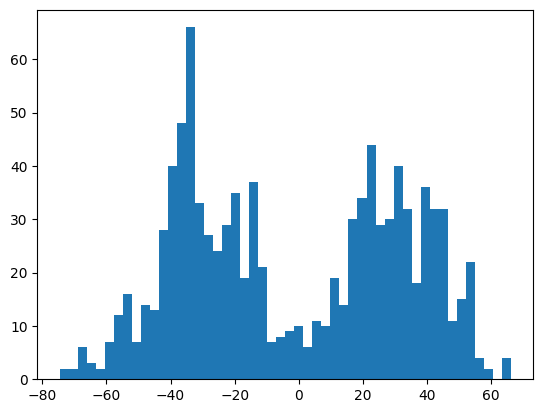

In [15]:
plt.hist(sampler.flatchain[:1000,0], bins=50);